# Trends in Voter Registration in October 2018 versus November 2018 Results

Exploring the dumbest correlation possible

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

## Data Cleaning

### Election Results Data

Reading in the November 2018 election results data, isolating State Senate races, and digesting their outcomes

In [2]:
election_df = pd.read_excel('../data/results/2018GeneralResults.xlsx')
election_df.head()

,OFFICE/BALLOT ISSUE NUMBER,PARTY,COUNTY,CANDIDATE/JUDGE/BALLOT TITLE,YES VOTES,YES PERCENT,NO VOTES,NO PERCENT
0,United States Representative - District 1,Republican Party,ARAPAHOE,Charles Casper Stockham,8300,0.0224,NaN,NaN
1,United States Representative - District 1,Republican Party,DENVER,Charles Casper Stockham,57186,0.1547,NaN,NaN
2,United States Representative - District 1,Republican Party,JEFFERSON,Charles Casper Stockham,19721,0.0533,NaN,NaN
3,United States Representative - District 1,Republican Party,TOTAL,Charles Casper Stockham,85207,0.2305,NaN,NaN
4,United States Representative - District 1,Democratic Party,ARAPAHOE,Diana DeGette,15645,0.0423,NaN,NaN


Pluck out State Senate election results as a separate dataframe

In [7]:
state_senate_df = election_df[election_df['OFFICE/BALLOT ISSUE NUMBER'].str.contains('State Senate')]
state_senate_df['OFFICE/BALLOT ISSUE NUMBER'] = state_senate_df['OFFICE/BALLOT ISSUE NUMBER'].str.replace('State Senate - District', 'SD')
county_vals = (state_senate_df.COUNTY != 'TOTAL')
state_senate_df = state_senate_df[county_vals]
elections = state_senate_df['OFFICE/BALLOT ISSUE NUMBER'].unique()
print(state_senate_df)

     OFFICE/BALLOT ISSUE NUMBER             PARTY      COUNTY  \
1778                       SD 1  Republican Party    CHEYENNE   
1779                       SD 1  Republican Party      ELBERT   
1780                       SD 1  Republican Party  KIT CARSON   
1781                       SD 1  Republican Party     LINCOLN   
1782                       SD 1  Republican Party       LOGAN   
...                         ...               ...         ...   
1913                      SD 32  Democratic Party      DENVER   
1915                      SD 32  Republican Party      DENVER   
1917                      SD 32       Independent      DENVER   
1919                      SD 34  Democratic Party      DENVER   
1921                      SD 34  Republican Party      DENVER   

     CANDIDATE/JUDGE/BALLOT TITLE YES VOTES  YES PERCENT  NO VOTES  NO PERCENT  
1778             Jerry Sonnenberg       829       0.0125       NaN         NaN  
1779             Jerry Sonnenberg     11132       0.1681 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Voter Registration Data

Reading in and digesting the October 2020 voter registration data by county and State Senate district

In [8]:
columns = ['DISTRICT', 'COUNTY', 
           'ACN-ACTIVE', 'APV-ACTIVE', 'DEM-ACTIVE', 'GRN-ACTIVE', 'LBR-ACTIVE', 'REP-ACTIVE',
       'UAF-ACTIVE', 'UNI-ACTIVE', 'TOTAL-ACTIVE', 
           'ACN-INACTIVE', 'APV-INACTIVE', 'DEM-INACTIVE', 'GRN-INACTIVE',
       'LBR-INACTIVE', 'REP-INACTIVE', 'UAF-INACTIVE', 'UNI-INACTIVE', 'TOTAL-INACTIVE', 
           'ACN-PREREG', 'APV-PREREG',
       'DEM-PREREG', 'GRN-PREREG', 'LBR-PREREG', 'REP-PREREG', 'UAF-PREREG', 'UNI-PREREG', 'TOTAL-PREREG',
           'TOTAL']

voter_affiliation_df = pd.read_excel('../data/registration/Oct_2018_voter_registration.xlsx', 'State Senate Districts', 
                                    header=2, names=columns)

# empty squares have no voters
voter_affiliation_df = voter_affiliation_df.fillna(0)

# Remove each "Total" County instance
county_vals = (voter_affiliation_df.COUNTY != 'Total')
voter_affiliation_df = voter_affiliation_df[county_vals]

For the sake of simplicity, assume everyone who isn't a Republican or Democrat is "Other", and look at that as a massed group.

In [9]:
collapsed_columns = {'ACN-ACTIVE' : 'OTHER-ACTIVE', 
                     'APV-ACTIVE' : 'OTHER-ACTIVE', 
                     'GRN-ACTIVE' : 'OTHER-ACTIVE', 
                     'LBR-ACTIVE' : 'OTHER-ACTIVE', 
                     'UAF-ACTIVE' : 'OTHER-ACTIVE', 
                     'UNI-ACTIVE' : 'OTHER-ACTIVE', 
                     'ACN-INACTIVE' : 'OTHER-INACTIVE', 
                     'APV-INACTIVE' : 'OTHER-INACTIVE', 
                     'DEM-INACTIVE' : 'OTHER-INACTIVE', 
                     'GRN-INACTIVE' : 'OTHER-INACTIVE',
                     'LBR-INACTIVE' : 'OTHER-INACTIVE', 
                     'REP-INACTIVE' : 'OTHER-INACTIVE', 
                     'UAF-INACTIVE' : 'OTHER-INACTIVE', 
                     'UNI-INACTIVE' : 'OTHER-INACTIVE',
                     'ACN-PREREG' : 'OTHER-PREREG', 
                     'APV-PREREG' : 'OTHER-PREREG',
                     'DEM-PREREG' : 'OTHER-PREREG', 
                     'GRN-PREREG' : 'OTHER-PREREG', 
                     'LBR-PREREG' : 'OTHER-PREREG', 
                     'REP-PREREG' : 'OTHER-PREREG', 
                     'UAF-PREREG' : 'OTHER-PREREG', 
                     'UNI-PREREG' : 'OTHER-PREREG',
                     'DISTRICT' : 'DISTRICT', 
                     'COUNTY' : 'COUNTY', 
                     'DEM-ACTIVE' : 'DEM-ACTIVE', 
                     'REP-ACTIVE' : 'REP-ACTIVE', 
                     'TOTAL-ACTIVE' : 'TOTAL-ACTIVE', 
                     'DEM-INACTIVE' : 'DEM-INACTIVE', 
                     'REP-INACTIVE' : 'REP-INACTIVE', 
                     'TOTAL-INACTIVE' : 'TOTAL-INACTIVE', 
                     'DEM-PREREG' : 'DEM-PREPREG', 
                     'REP-PREREG' : 'REP-PREREG', 
                     'TOTAL-PREREG' : 'TOTAL-PREREG',
                     'TOTAL' : 'TOTAL'
                    }

voter_affiliation_df = voter_affiliation_df.groupby(collapsed_columns, axis=1).sum()

voter_affiliation_df['COUNTY'] = voter_affiliation_df['COUNTY'].str.upper()
print(voter_affiliation_df)

         COUNTY  DEM-ACTIVE  DEM-INACTIVE  DEM-PREPREG     DISTRICT  \
0      CHEYENNE         129            23          0.0         SD 1   
1        ELBERT        2185           239         16.0         SD 1   
2    KIT CARSON         519            85          4.0         SD 1   
3       LINCOLN         377            73          0.0         SD 1   
4         LOGAN        1665           279          1.0         SD 1   
..          ...         ...           ...          ...          ...   
119     PROWERS        1279           192         16.0        SD 35   
120      PUEBLO        3877           242         28.0        SD 35   
121  RIO GRANDE        2068           314          3.0        SD 35   
122    SAGUACHE        1570           242          0.0        SD 35   
124         NaN     1038975        144932       8420.0  State Total   

     OTHER-ACTIVE  OTHER-INACTIVE  OTHER-PREREG  REP-ACTIVE  REP-INACTIVE  \
0           301.0            62.0           6.0         804           

## Election Analysis

Goal here is to look at active voters in each party versus how the vote broke in each county and Senate District election. This leads to a 3x3 plot that shows the fraction of total active voters in each party for each county and Senate District, and then the fraction of the votes from that county that went to each party, D/R/Other.

In [66]:
regs_dict={'D' : [],
          'R' : [],
          'O' : []}

votes_dict={'D' : [],
           'R' : [],
           'O' : []}

tot_votes = []

for election in elections:
    district_election = state_senate_df[state_senate_df['OFFICE/BALLOT ISSUE NUMBER'] == election]
    district_voters   = voter_affiliation_df[voter_affiliation_df['DISTRICT'] == election]
    for county in district_election.COUNTY.unique():
        # Get total active voters from a district
        tot_votes.append(district_voters[district_voters.COUNTY == county]['TOTAL-ACTIVE'].values[0])
        
        # Party affiliation of active voters as fraction of total active voters
        county_voters = (district_voters.COUNTY == county)
        Ds = district_voters[county_voters]['DEM-ACTIVE'].values[0]
        Rs = district_voters[county_voters]['REP-ACTIVE'].values[0]
        Os = district_voters[county_voters]['OTHER-ACTIVE'].values[0]
        regs_dict['D'].append(1.*Ds/(Ds+Rs+Os))
        regs_dict['R'].append(1.*Rs/(Ds+Rs+Os))
        regs_dict['O'].append(1.*Os/(Ds+Rs+Os))
        
        # Total votes cast
        county_election = (district_election['COUNTY']==county)

        if len(district_election[county_election][district_election[county_election].PARTY == 'Democratic Party']):
            dem_votes = district_election[county_election][district_election[county_election].PARTY == 'Democratic Party']['YES VOTES'].values[0]
        if len(district_election[county_election][district_election[county_election].PARTY == 'Republican Party']):
            rep_votes = district_election[county_election][district_election[county_election].PARTY == 'Republican Party']['YES VOTES'].values[0]
        
        other_candidates = (district_election[county_election].PARTY != 'Republican Party') & (district_election[county_election].PARTY != 'Democratic Party')
        other_votes = district_election[county_election][other_candidates]['YES VOTES'].sum()
        
        votes_cast = dem_votes + rep_votes + other_votes
        
        print('Election {} in {} county \n'.format(election, county))
        print('dem vote fraction = {}'.format(dem_votes/votes_cast))
        print('rep vote fraction = {}'.format(rep_votes/votes_cast))
        print('other vote fraction = {}'.format(other_votes/votes_cast))
        print('-----')
        
        votes_dict['D'].append(dem_votes/votes_cast)
        votes_dict['R'].append(rep_votes/votes_cast)
        votes_dict['O'].append(other_votes/votes_cast)

Election SD 1 in CHEYENNE county 

dem vote fraction = 0.13735691987513007
rep vote fraction = 0.8626430801248699
other vote fraction = 0.0
-----
Election SD 1 in ELBERT county 

dem vote fraction = 0.22549224239894247
rep vote fraction = 0.7745077576010575
other vote fraction = 0.0
-----
Election SD 1 in KIT CARSON county 

dem vote fraction = 0.16210873146622734
rep vote fraction = 0.8378912685337726
other vote fraction = 0.0
-----
Election SD 1 in LINCOLN county 

dem vote fraction = 0.1679649464459591
rep vote fraction = 0.832035053554041
other vote fraction = 0.0
-----
Election SD 1 in LOGAN county 

dem vote fraction = 0.17457527826596367
rep vote fraction = 0.8254247217340364
other vote fraction = 0.0
-----
Election SD 1 in MORGAN county 

dem vote fraction = 0.259831996945399
rep vote fraction = 0.740168003054601
other vote fraction = 0.0
-----
Election SD 1 in PHILLIPS county 

dem vote fraction = 0.15753424657534246
rep vote fraction = 0.8424657534246576
other vote fraction =

3


Text(0.5, 0, 'D registered')

Text(0, 0.5, 'D votes')

Text(0.5, 0, 'R registered')

Text(0, 0.5, 'D votes')

Text(0.5, 0, 'O registered')

Text(0, 0.5, 'D votes')

Text(0.5, 0, 'D registered')

Text(0, 0.5, 'R votes')

Text(0.5, 0, 'R registered')

Text(0, 0.5, 'R votes')

Text(0.5, 0, 'O registered')

Text(0, 0.5, 'R votes')

Text(0.5, 0, 'D registered')

Text(0, 0.5, 'O votes')

Text(0.5, 0, 'R registered')

Text(0, 0.5, 'O votes')

Text(0.5, 0, 'O registered')

Text(0, 0.5, 'O votes')

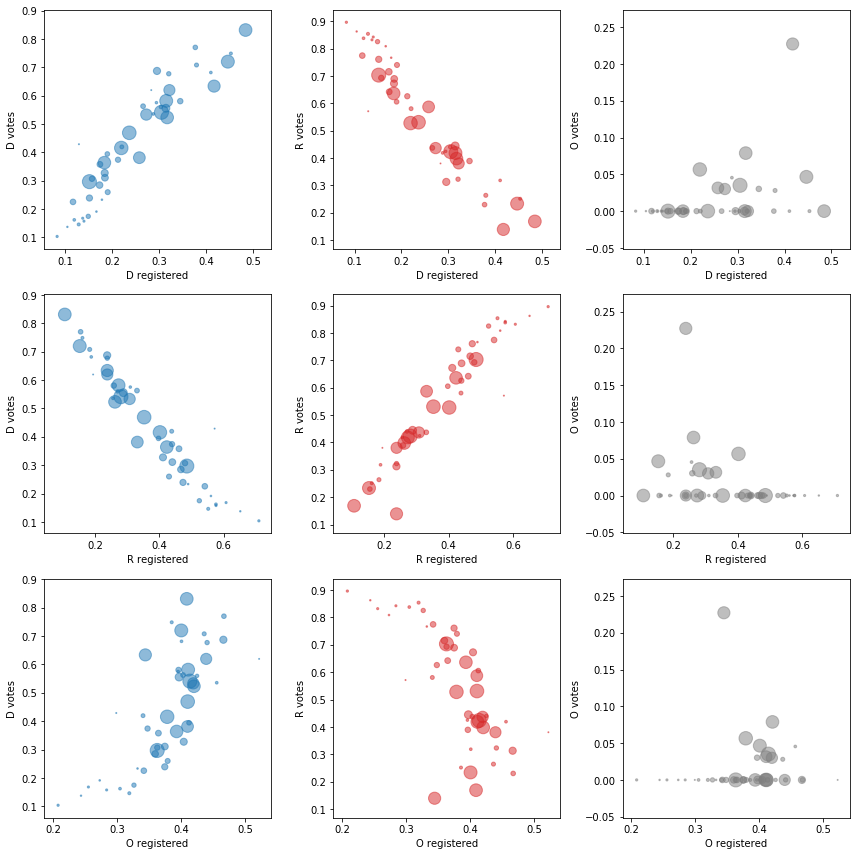

In [67]:
fig, ax = plt.subplots(3,3, figsize = (12,12))
print(len(ax))
ax_idx1 = 0
ax_idx2 = 0
vote_keys = ['D', 'R', 'O']
regs_keys = ['D', 'R', 'O']

color_key = {'D' :'tab:blue',
            'R' : 'tab:red',
            'O' : 'tab:gray'}
                       #[ax11, ax12, ax13, ax21, ax22, ax23, ax31, ax32, ax33]
#fig.title('Registration as Fraction of Voting Body')

for vote_key in vote_keys:
    for regs_key in regs_keys:
        this_ax = ax[ax_idx1][ax_idx2]
        this_ax.scatter(regs_dict[regs_key], votes_dict[vote_key], 
                           s = tot_votes/min(tot_votes), 
                           label='{} vs {}'.format(regs_key, vote_key),
                            c = color_key[vote_key],
                           alpha=0.5)
        this_ax.set_xlabel('{} registered'.format(regs_key))
        this_ax.set_ylabel('{} votes'.format(vote_key))
        ax_idx1 += 1
    ax_idx1 = 0
    ax_idx2 += 1
fig.tight_layout()
fig.savefig('votes_vs_regs.png')